# CC3001 Otoño 2023 Tarea 5 - Luciano Márquez

## ABBs posicionales

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Nelson Baloian •
Sección 3 Patricio Poblete



In [ ]:
!pip install aed-utilities

import aed_utilities as aed
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for aed-utilities: filename=aed_utilities-0.5.6-py3-none-any.whl size=4542 sha256=071b58bec31c70c01526320a3f0a7f81ca383ee6b0e1249d87988e03858ea22d
  Stored in directory: /root/.cache/pip/wheels/db/6d/39/cc766f956b1e504722228ad30c8154cd48f4470e7e24dcfd0e
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=6f73b8ca75b04179fa350c23141736f827ab77ec99e2da761a78d0fdf82a1d64
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built aed-utilities validators


## Introducción

Un *árbol de búsqueda binaria posicional* (*ABB posicional*) es un ABB modificado para que en cada nodo se agregue un campo adicional, que es un contador del número de llaves que hay en el subárbol que tiene a ese nodo como raíz, como se ve en el siguiente ejemplo:

![Ejemplo ABB posicional](https://www.dcc.uchile.cl/ppoblete/cc3001/ABBposicional.png)

Con esta información adicional, es posible, dado un valor de $k$, encontrar rápidamente el que sería el $k$-ésimo elemento, en un recorrido en inorden de izquierda a derecha ($k=1,\ldots,n$, donde $n$ es el número de llaves del árbol). Por ser un ABB, esto es lo mismo que encontrar el $k$-ésimo menor elemento del conjunto.

Llamaremos a esta operación ``find(k)``, la cual al ser ejecutada retorna un puntero al $k$-ésimo nodo interno, de izquierda a derecha. Si $k$ está fuera del rango $[1..n]$ se debe retornar ``None``.

Para implementar esta operación, comenzamos en la raíz y miramos el contador del hijo izquierdo. Si éste es mayor o igual que $k$, entonces el $k$-ésimo debe estar en el subárbol izquierdo, y lo seguimos buscando ahí recursivamente. Si $k$ es exactamente 1 más que el contador del hijo izquierdo, el elemento buscado es la raíz, así que retornamos un puntero a él. Por último, si no ha sido ninguno de los casos anteriores, el $k$-ésimo debe estar en el subárbol derecho, así que seguimos buscando ahí recursivamente. Pero, dentro de ese subárbol, el elemento buscado ya no es el $k$-ésimo, hay que restarle al $k$ una cantidad (¿cuánto?). Por ejemplo, si estábamos originalmente buscando el elemento con $k=5$, el que sería la llave "$62$", una vez que vamos a buscarlo dentro del subárbol derecho, dentro de ese árbol es el elemento con $k=2$.

## Objetivo de la tarea

Su trabajo consiste en implementar las clases ``Arbol``, ``Nodoi`` y ``Nodoe`` y los métodos ``insert``, ``search`` y ``find`` en todos lugares en donde corresponda (no se pide implementar ``delete``). Luego debe ejecutar los casos de prueba que se indica.

Note que la operación ``insert``, además de agregar la llave que se indica, debe modificar los contadores que sea necesario para que éstos reflejen correctamente los tamaños de los subárboles respectivos.

Esta tarea se puede resolver con recursividad o sin recursividad. Usted debe decidir cuál enfoque usar.

En el código que aparece a continuación usted debe agregar todo lo necesario para que la implementación esté completa.

_Nota_: El campo "``rep``" contiene la representación visual del nodo, que va a aparecer cuando se dibuje.

In [ ]:
class Nodoi:
    def __init__(self, izq, info, contador, der):
        self.izq=izq
        self.info=info
        self.contador=contador
        self.der=der
        self.rep = str(info)+ ',' + str(contador)

    def __str__(self):
        return "("+self.izq.__str__()+str(self.info)+self.der.__str__()+")"

    def insert(self, x):#igual que en el apunte, el único cambio es que cada vez que sea pasa por un nodo para insertar, se le suma uno al contador
        if x < self.info:
          return Nodoi(self.izq.insert(x), self.info, self.contador + 1, self.der)
        else:
          return Nodoi(self.izq, self.info, self.contador + 1, self.der.insert(x))

    def search(self, x):
        if self.info == x:
          return self
        elif self.info > x:
          return self.izq.search(x)
        else:
          return self.der.search(x)

    def find(self, k):
        if self.izq.contador >= k: #el contador del hijo izq es mayor o igual a k
          return self.izq.find(k)
        elif self.izq.contador + 1 == k: #el contador del hijo izq nos dice que se está buscando el nodo actual
          return self
        else:
          k -= (self.contador - self.der.contador) #ajuste del k
          return self.der.find(k)


class Nodoe:
    def __init__(self,contador):
        self.contador=contador
        self.rep=contador

    def __str__(self):
        return"☐"

    def insert(self, x):
        return Nodoi(Nodoe(0),x,1,Nodoe(0))

    def search(self, x):
        return None

    def find(self, k):
        return None



class Arbol:
    def __init__(self,raiz=Nodoe(0)):
        self.raiz=raiz

    def __str__(self):
        return self.raiz.__str__()

    def insert(self, x):
        self.raiz = self.raiz.insert(x)

    def search(self, x):
        return self.raiz.search(x)

    def find(self, k):
        if self.raiz.izq.contador >= k: #el contador del hijo izq es mayor o igual a k
          return self.raiz.izq.find(k)
        elif self.raiz.izq.contador + 1 == k:# el contador del hijo izq nos dice que el k buscado es la raiz
          return self
        else:
          k -= (self.raiz.contador - self.raiz.der.contador)#ajuste al k según los contadores ya considerados
          return self.raiz.der.find(k)

    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="rep", fieldLeft="izq", fieldRight="der", classNone=Nodoe)
      btd.draw_tree(self, "raiz")



Las siguientes funciones son útiles para probar su implementación:

In [ ]:
def test_search(a,x):
    print(x, "está" if a.search(x) is not None else "no está")
def test_find(a,k):
    p=a.find(k)
    print("La k-ésima llave para k=",k, "es", p.info if p is not None else "fuera de rango")

## Prueba: Construir un árbol por inserciones sucesivas

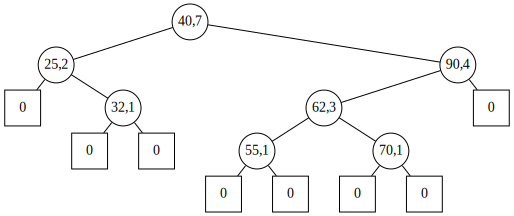

62 está
10 no está
La k-ésima llave para k= 5 es 62
La k-ésima llave para k= 8 es fuera de rango


In [ ]:
a=Arbol()
a.insert(40)
a.insert(25)
a.insert(32)
a.insert(90)
a.insert(62)
a.insert(55)
a.insert(70)
a.dibujar()
test_search(a,62)
test_search(a,10)
test_find(a,5)
test_find(a,8)

Más tests!

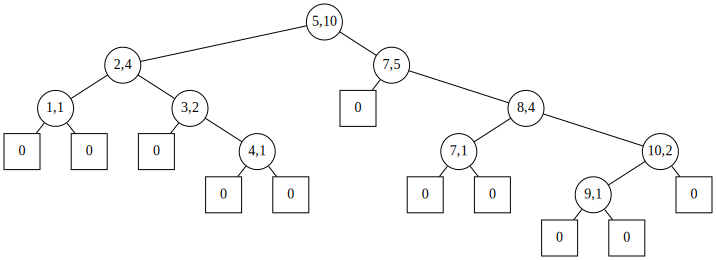

2 está
4 está
5 está
8 está
10 está
15 no está
100 no está

La k-ésima llave para k= 1 es 1
La k-ésima llave para k= 2 es 2
La k-ésima llave para k= 3 es 3
La k-ésima llave para k= 4 es 4
La k-ésima llave para k= 5 es 5
La k-ésima llave para k= 6 es 7
La k-ésima llave para k= 7 es 7
La k-ésima llave para k= 8 es 8
La k-ésima llave para k= 9 es 9
La k-ésima llave para k= 10 es 10


In [ ]:
b=Arbol()
b.insert(5)
b.insert(2)
b.insert(7)
b.insert(8)
b.insert(3)
b.insert(1)
b.insert(10)
b.insert(4)
b.insert(7)
b.insert(9)
b.dibujar()

for s in [2,4,5,8,10,15,100]:
  test_search(b,s)

print("")

for i in range(1,10+1):
  if i == 5:
    print("La k-ésima llave para k=",i, "es", b.find(i).raiz.info if b.find(i) is not None else "fuera de rango")#i es la raiz
  else:
    test_find(b,i)
